Sau day la phan chay hoi quy tuyen tinh

Import cac thu vien

In [46]:
import pandas as pd
from pymongo import MongoClient
import statsmodels.api as sm
import numpy as np


Load data tu database

In [47]:
client = MongoClient('mongodb://localhost:27017/') 
db=client['laptopData']
collection1=db['duy']
collection2=db['Dong']
collection3=db['khiem']

data1=list(collection1.find({},{'_id':0,'Inches':1,'Weight':1, 'dummy_res':1, 'dummy_panel':1, 'is_touchable':1}))
data2=list(collection2.find({},{'_id':0}))
data3=list(collection3.find({},{'_id':0, 'Cpu_Value':1, 'Memory_Type':1, 'Gpu_dummy':1, 'Price_USD':1}))

df1=pd.DataFrame(data1)
df2=pd.DataFrame(data2)
df3=pd.DataFrame(data3)
df=(df1.join(df2)).join(df3)

df

,Inches,Weight,dummy_res,dummy_panel,is_touchable,Lenovo,Dell,HP,Asus,MSI,...,Workstation,Netbook,Other_TypeName,Ram_Number,Windows,Other_OpSys,Cpu_Value,Memory_Type,Gpu_dummy,Price_USD
0,13.3,1.37,2,1,0,0,0,0,0,0,...,0,0,0,8,0,1,1,1,1,842.268462
1,13.3,1.34,1,0,0,0,0,0,0,0,...,0,0,0,8,0,1,1,0,1,565.167174
2,15.6,1.86,1,0,0,0,0,1,0,0,...,0,0,0,8,0,1,1,1,1,361.504800
3,15.4,1.83,2,1,0,0,0,0,0,0,...,0,0,0,16,0,1,1,1,0,1595.304965
4,13.3,1.37,2,1,0,0,0,0,0,0,...,0,0,0,8,0,1,1,1,1,1133.930534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,14.0,1.80,1,1,1,1,0,0,0,0,...,0,0,0,4,1,0,1,1,1,401.113152
1269,13.3,1.30,3,1,1,1,0,0,0,0,...,0,0,0,16,1,0,1,1,1,942.427296
1270,14.0,1.50,1,0,0,1,0,0,0,0,...,0,0,0,2,1,0,1,0,1,143.973216
1271,15.6,2.19,1,0,0,0,0,1,0,0,...,0,0,0,6,1,0,1,2,0,480.329856


In [48]:
df.columns

df.dropna()

,Inches,Weight,dummy_res,dummy_panel,is_touchable,Lenovo,Dell,HP,Asus,MSI,...,Workstation,Netbook,Other_TypeName,Ram_Number,Windows,Other_OpSys,Cpu_Value,Memory_Type,Gpu_dummy,Price_USD
0,13.3,1.37,2,1,0,0,0,0,0,0,...,0,0,0,8,0,1,1,1,1,842.268462
1,13.3,1.34,1,0,0,0,0,0,0,0,...,0,0,0,8,0,1,1,0,1,565.167174
2,15.6,1.86,1,0,0,0,0,1,0,0,...,0,0,0,8,0,1,1,1,1,361.504800
3,15.4,1.83,2,1,0,0,0,0,0,0,...,0,0,0,16,0,1,1,1,0,1595.304965
4,13.3,1.37,2,1,0,0,0,0,0,0,...,0,0,0,8,0,1,1,1,1,1133.930534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,14.0,1.80,1,1,1,1,0,0,0,0,...,0,0,0,4,1,0,1,1,1,401.113152
1269,13.3,1.30,3,1,1,1,0,0,0,0,...,0,0,0,16,1,0,1,1,1,942.427296
1270,14.0,1.50,1,0,0,1,0,0,0,0,...,0,0,0,2,1,0,1,0,1,143.973216
1271,15.6,2.19,1,0,0,0,0,1,0,0,...,0,0,0,6,1,0,1,2,0,480.329856


In [49]:
# Bien phu thuoc
y=df['Price_USD']
# Cac bien doc lap
X=df.drop(columns=['Price_USD'])

X=sm.add_constant(X)

model=sm.OLS(y,X)

result=model.fit()

print(result.summary())



                            OLS Regression Results                            
Dep. Variable:              Price_USD   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     124.3
Date:                Sat, 23 Nov 2024   Prob (F-statistic):          4.80e-280
Time:                        01:21:47   Log-Likelihood:                -8859.6
No. Observations:                1273   AIC:                         1.776e+04
Df Residuals:                    1252   BIC:                         1.787e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                183.5224     70

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)



              Variable       VIF
0                const  0.000000
1               Inches  3.181318
2               Weight  3.918132
3            dummy_res  1.389139
4          dummy_panel  1.349668
5         is_touchable  3.067875
6               Lenovo       inf
7                 Dell       inf
8                   HP       inf
9                 Asus       inf
10                 MSI       inf
11          Other_Comp       inf
12            Notebook       inf
13              Gaming       inf
14           Ultrabook       inf
15  2 in 1 Convertible       inf
16         Workstation       inf
17             Netbook       inf
18      Other_TypeName       NaN
19          Ram_Number  1.546190
20             Windows       inf
21         Other_OpSys       inf
22           Cpu_Value  1.413562
23         Memory_Type  1.341402
24           Gpu_dummy  1.984126


/home/duy-laptop/python/myenv/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/home/duy-laptop/python/myenv/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/home/duy-laptop/python/myenv/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [51]:
# Bien phu thuoc
y=df['Price_USD']
# Cac bien doc lap
X=df.drop(columns=['Price_USD','Other_OpSys','Other_TypeName','Other_Comp','2 in 1 Convertible'])

X=sm.add_constant(X)

model=sm.OLS(y,X)

result=model.fit()

print(result.summary())



                            OLS Regression Results                            
Dep. Variable:              Price_USD   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     124.3
Date:                Sat, 23 Nov 2024   Prob (F-statistic):          4.80e-280
Time:                        01:21:47   Log-Likelihood:                -8859.6
No. Observations:                1273   AIC:                         1.776e+04
Df Residuals:                    1252   BIC:                         1.787e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          173.5237    131.576      1.319   

In [52]:
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)



        Variable         VIF
0          const  333.728905
1         Inches    3.181318
2         Weight    3.918132
3      dummy_res    1.389139
4    dummy_panel    1.349668
5   is_touchable    3.067875
6         Lenovo    1.896417
7           Dell    2.134363
8             HP    1.961036
9           Asus    1.731050
10           MSI    1.719976
11      Notebook    9.031636
12        Gaming    6.987447
13     Ultrabook    4.352525
14   Workstation    1.878463
15       Netbook    1.598150
16    Ram_Number    1.546190
17       Windows    1.127640
18     Cpu_Value    1.413562
19   Memory_Type    1.341402
20     Gpu_dummy    1.984126


In [53]:
# Bien phu thuoc
y=df['Price_USD']
# Cac bien doc lap
X=df.drop(columns=['Price_USD','Other_OpSys','Other_TypeName','Other_Comp','2 in 1 Convertible','Netbook',"Inches", "Weight", "dummy_panel", "Dell", "MSI", "Notebook",'Lenovo'])

X=sm.add_constant(X)

model=sm.OLS(y,X)

result=model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_USD   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     205.3
Date:                Sat, 23 Nov 2024   Prob (F-statistic):          3.86e-286
Time:                        01:21:47   Log-Likelihood:                -8866.1
No. Observations:                1273   AIC:                         1.776e+04
Df Residuals:                    1260   BIC:                         1.783e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          117.8676     56.495      2.086   

In [54]:
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


        Variable        VIF
0          const  61.283431
1      dummy_res   1.321157
2   is_touchable   1.248767
3             HP   1.121451
4           Asus   1.094261
5         Gaming   1.859658
6      Ultrabook   1.194699
7    Workstation   1.089327
8     Ram_Number   1.464012
9        Windows   1.073738
10     Cpu_Value   1.311272
11   Memory_Type   1.095401
12     Gpu_dummy   1.806006


In [55]:
X=np.log(X+1)

X=sm.add_constant(X)

model=sm.OLS(y,X)

result=model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_USD   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     222.3
Date:                Sat, 23 Nov 2024   Prob (F-statistic):          1.04e-300
Time:                        01:21:48   Log-Likelihood:                -8832.1
No. Observations:                1273   AIC:                         1.769e+04
Df Residuals:                    1260   BIC:                         1.776e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1026.6388    129.452     -7.931   

<Axes: ylabel='Count'>

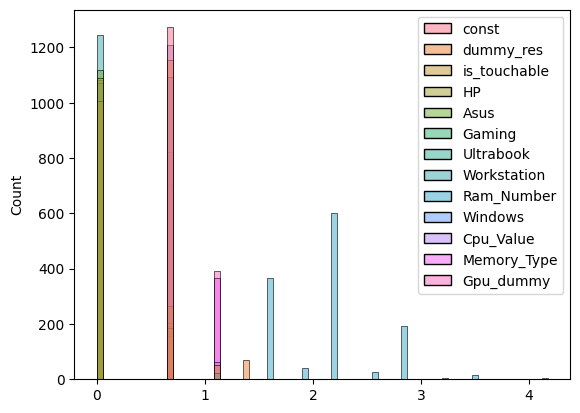

In [56]:
import seaborn as sns

sns.histplot(X)

In [59]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor()
gb_model.fit(X, y)
print("Gradient Boosting R^2:", gb_model.score(X, y))
print(gb_model)

Gradient Boosting R^2: 0.7920728586428847
GradientBoostingRegressor()


In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [60]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Dự đoán trên tập huấn luyện
y_pred = gb_model.predict(X)

# Tính toán các chỉ số
r2_score = gb_model.score(X, y)
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)

# In ra summary
print("Gradient Boosting Regression Summary")
print("-------------------------------------")
print(f"R^2: {r2_score:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print("\nModel Parameters:")
print(f"Learning Rate: {gb_model.learning_rate}")
print(f"Number of Estimators: {gb_model.n_estimators}")
print(f"Max Depth: {gb_model.max_depth}")
print(f"Min Samples Split: {gb_model.min_samples_split}")
print(f"Min Samples Leaf: {gb_model.min_samples_leaf}")


Gradient Boosting Regression Summary
-------------------------------------
R^2: 0.7921
Mean Squared Error (MSE): 40318.3044
Mean Absolute Error (MAE): 142.9437

Model Parameters:
Learning Rate: 0.1
Number of Estimators: 100
Max Depth: 3
Min Samples Split: 2
Min Samples Leaf: 1
